<a href="https://colab.research.google.com/github/soyoonjeong/DeepLearning-study/blob/main/%ED%9A%8C%EA%B7%80%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import boston_housing

(train_data, train_targets),(test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [6]:
import pandas as pd
pd.DataFrame(train_data).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [4]:
mean = train_data.mean(axis=0)
train_data-=mean
std = train_data.std(axis=0)
train_data/=std

test_data-=mean
test_data/=std

In [5]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', 
                         input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation="relu"))
  model.add(layers.Dense(1))

  model.compile(optimizer = 'rmsprop',
                loss="mse",
                metrics=["mae"])
  
  return model

In [6]:
import numpy as np

k = 4
num_val_samples = len(train_data)//k
all_scores = []
num_epochs = 100
for i in range(k):
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples :]], 
      axis = 0)
  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples :]],
       axis = 0)

  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
            epochs = num_epochs,
            batch_size = 1, verbose = 0)
  val_mse, val_mae = model.evaluate(val_data, val_targets)
  all_scores.append(val_mae)

4/4 [==============================] - 0s 4ms/step - loss: 10.6939 - mae: 2.2436


In [7]:
print(all_scores)
np.mean(all_scores)

[1.8345657587051392, 2.554344892501831, 2.6798336505889893, 2.2435691356658936]


2.3280783593654633

In [23]:
import numpy as np

k = 4
num_val_samples = len(train_data)//k
all_mae_histories = []
num_epochs = 500
for i in range(k):
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples :]],
       axis = 0)
  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples :]], 
      axis = 0)

  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
            epochs = num_epochs,
            batch_size = 1, verbose = 0, validation_data=(val_data,val_targets))
  all_mae_histories.append(history.history["val_mae"])

In [25]:
np.array(all_mae_histories).shape

(4, 500)

In [26]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [27]:
for x in all_mae_history:
  print(x)

[3.3315305709838867, 2.699294328689575, 2.46773624420166, 2.512603759765625, 2.281050205230713, 2.179798126220703, 2.211071729660034, 2.542252540588379, 2.3596243858337402, 1.948799967765808, 2.0279698371887207, 2.404029130935669, 2.1954455375671387, 2.098562479019165, 2.237668037414551, 2.1340537071228027, 2.0385637283325195, 2.1416094303131104, 2.0268592834472656, 1.9792507886886597, 2.33139705657959, 2.044168710708618, 1.9853007793426514, 2.0398595333099365, 1.969693660736084, 2.1045186519622803, 2.224656343460083, 2.0520596504211426, 2.337531566619873, 2.0538949966430664, 1.9544808864593506, 1.9733078479766846, 1.9068629741668701, 2.0248868465423584, 1.9872452020645142, 2.386255979537964, 1.8868939876556396, 1.9393794536590576, 1.9591057300567627, 3.067091226577759, 2.0847408771514893, 2.39228892326355, 2.1019680500030518, 2.0188968181610107, 1.9009902477264404, 2.7032930850982666, 2.5655064582824707, 1.9006305932998657, 2.369544267654419, 2.0532755851745605, 2.7101857662200928, 1.

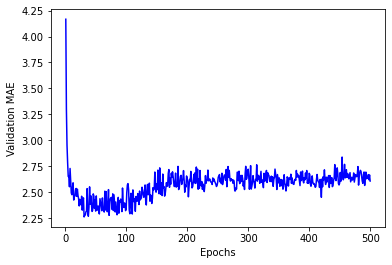

In [29]:
import matplotlib.pyplot as plt

epochs = range(1,num_epochs+1)

plt.plot(epochs, average_mae_history, 'b')
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

<function matplotlib.pyplot.show>

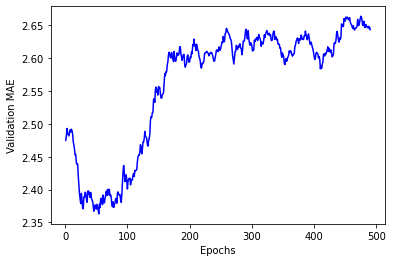

In [34]:
def smooth_curve(points, factor = 0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous*factor+point*(1-factor))
    else:
      smoothed_points.append(point) 
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
epochs = range(1, len(smooth_mae_history)+1)
plt.plot(epochs, smooth_mae_history,'b')
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show

In [35]:
model = build_model()
model.fit(train_data, train_targets,
          epochs = 80, batch_size = 16, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

4/4 [==============================] - 0s 2ms/step - loss: 17.6475 - mae: 2.5563


2.556262254714966